In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
df=pd.read_csv('hour.csv')
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [10]:
# Create a binary target variable: 1 if cnt > 500, else 0
df['high_demand'] = np.where(df['cnt'] > 500, 1, 0)

# Define features and target
X = df.drop(['instant', 'dteday', 'cnt', 'casual', 'registered', 'high_demand'], axis=1)
y = df['high_demand']


In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


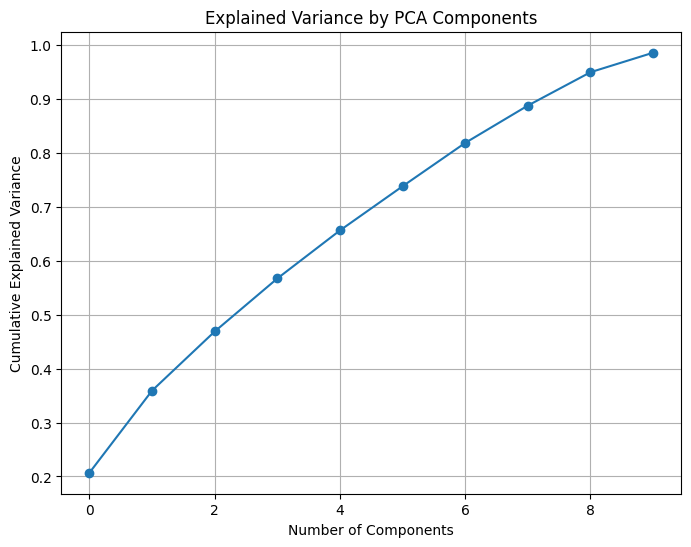

In [13]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


Accuracy: 0.9266
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3231
           1       0.19      0.01      0.02       245

    accuracy                           0.93      3476
   macro avg       0.56      0.50      0.49      3476
weighted avg       0.88      0.93      0.90      3476



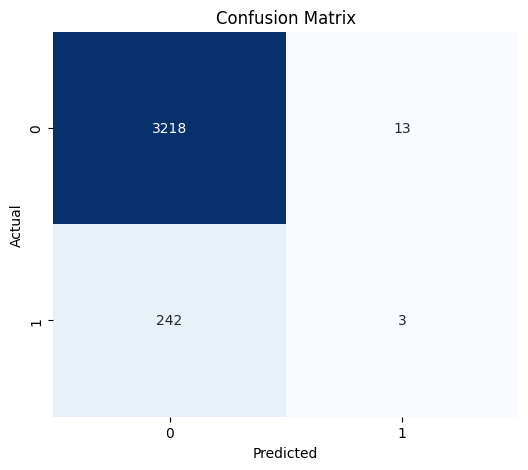

In [14]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [16]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score


accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)
precision=precision_score(y_test,y_pred)
print("precision score",precision)
recall=recall_score(y_test,y_pred)
print("Recall score",recall)
f1= f1_score(y_test,y_pred)
print("f1_score",f1)

accuracy 0.9266398158803222
precision score 0.1875
Recall score 0.012244897959183673
f1_score 0.022988505747126436


In [18]:
data ={
    "accuracy":[accuracy],
    "precision_score":[precision],
    "recall_score":[recall],
    "f1_score":[f1]
}
df=pd.DataFrame(data)
df.to_csv("Dataset2.csv",index=True)